# Neural Network Assignment

Handwritten digit recognition has gained so much popularity. We want to implment a Neural Network to classify the images of handwritten digits as 10 digits (0–9). We will use the ```digits dataset``` available in sklearn.

**Please always explain and justify every choice you make, comment your code, describe the plots and results you obtain.**

#### Import libraries

In [0]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


#### Import dataset

In [0]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

We will be using ```digits.images``` and ```digits.target```

In [4]:
digits.images.shape

(1797, 8, 8)

```digits.image``` is an array with 3 dimensions. The first dimension indexes images, and we see that we have 1797 images in total. The next two dimensions correspond to the size in pixels of each image. Each image has 8x8 = 64 pixels. 

Let's look at the data of the first 8x8 image. Each slot in the array corresponds to a pixel, and the value in the slot is the amount of black (intensity) in the pixel

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Now let's display this image

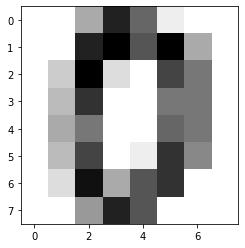

In [6]:
plt.imshow(digits.images[0],cmap='binary')
plt.show()

Originally the image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn to make it easier and faster to train a machine learning algorithm to recognize these digits.

In [7]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. For example, the first target is 0, and corresponds to the image drawn just above.

**Write a function that plot 16 digits of the dataset, starting with the digit in a specific position that will be specified as parameter of the function**

In [0]:
def plot_multi(i):
    plots = 16
    fig = plt.figure(figsize=(12,12))
    for j in range(plots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()
    
    
    

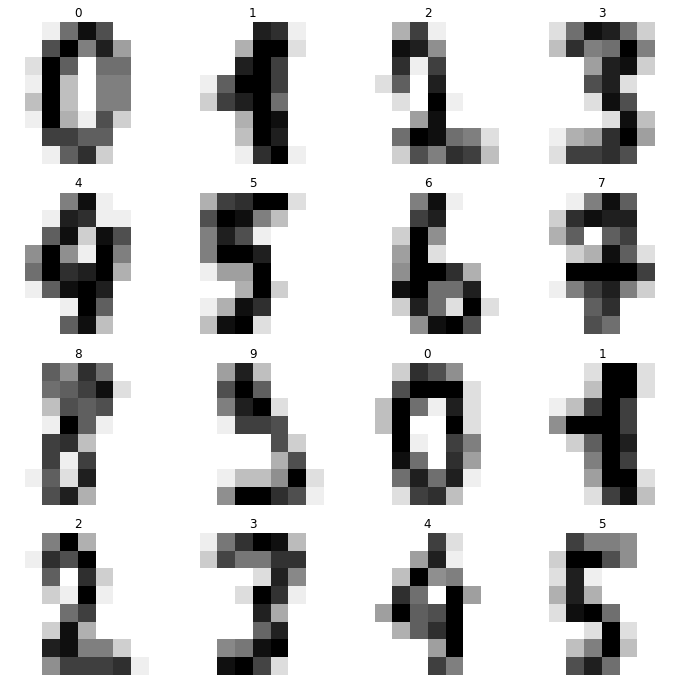

In [9]:
plot_multi(10)

### Building the network and preparing the input data

The input layer requires a 1-dimensional array in input, but our images are 2D. So we need to flatten all images. Use the [```reshape```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) function of python

In [10]:
y = digits.target

#One shape dimension can be -1. 
#In this case, the value is inferred from the length of the array and remaining dimensions.

x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

We now have $1797$ flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension.

Generate the training and test set. Use random_state=0 and test_size 20%

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


#### Now we want to implement a feed-forward neural network through the ```MLPClassifier```. When implmenting a Neural Network there are multiple ```hyperparameters```that need to be tuned in order to find the best configuration for our Neural Network. 

#### To this end use ```sklearn.model_selection.GridSearchCV```.
- Values for the grid search:
    - solvers: 'sgd','lbfgs', 'adam'
    - activation functions: 'logistic', 'tanh', 'relu'
    - values for alpha: 0.1   , 0.01  , 0.001 , 0.0001
    - hidden layer sizes: np.arange(12, 18)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn import neural_network

# Look https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html for MLPClassifier doc

from sklearn.neural_network import MLPClassifier

parameters = {'solver': ['sgd','lbfgs', 'adam'], 
              'activation': ['logistic', 'tanh', 'relu'],
              'alpha': [0.1, 0.01, 0.001, 0.0001],
              "hidden_layer_sizes": np.arange(12, 18) 
             }
clf_grid = GridSearchCV(MLPClassifier(max_iter=500), parameters, n_jobs=-1)

In [18]:
import datetime
a = datetime.datetime.now()
clf_grid.fit(x,y)
b = datetime.datetime.now()
c =b - a
print('Time to train: %.2f seconds ' % c.seconds)



print("-----------------Best Model--------------------")


print("Best score: ", clf_grid.best_score_)  #######################################
print("Using the following parameters:")
print(clf_grid.best_params_)       ########################################

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Time to train: 787.00 seconds 
-----------------Best Model--------------------
Best score:  0.9415692821368948
Using the following parameters:
{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': 16, 'solver': 'lbfgs'}


### Fitting classifier with best parameters

In [0]:
from sklearn.neural_network import MLPClassifier

### Create an instance of the the MLPClassifier with the best parameters found with gridSearch
mlp = MLPClassifier(activation = "logistic", alpha= 0.1, hidden_layer_sizes = 16, solver = "lbfgs", max_iter=500)

In [20]:
## Fit the model
mlp.fit(x,y)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=16, learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

We obtained a warning sayng that the optimization algorithm was not able to converge. How can we solve this problem?

In [0]:
# PUT YOUR CODE HERE


In [21]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=16, learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Compute prediction

In [22]:
predictions = mlp.predict(X_test)
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 1, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1, 5, 5, 2, 5, 9, 0, 7, 2, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 0, 1, 5, 2, 5, 1, 4, 1, 4, 0, 6, 1, 5, 3, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 1, 2, 0, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 9, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

### Evaluate the performance of the model computing the classification report and the accuracy score for training and test

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.79      0.86      0.82        35
           2       0.94      0.92      0.93        36
           3       0.97      1.00      0.98        29
           4       0.97      0.97      0.97        30
           5       1.00      0.95      0.97        40
           6       1.00      0.98      0.99        44
           7       0.97      0.97      0.97        39
           8       0.94      0.87      0.91        39
           9       0.90      0.93      0.92        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



##### Note that in this case we did not need to normliaze data since all the features are in the same scale

In [26]:
predictions_train = mlp.predict(X_train)
predictions_train

array([6, 5, 3, ..., 7, 7, 8])

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy on training set: ", round(accuracy_score(y_train, predictions_train),3))
print("Accuracy on test set: ", round(accuracy_score(y_test, predictions),3))

Accuracy on training set:  1.0
Accuracy on test set:  0.942
